<a href="https://colab.research.google.com/github/CameronwBates/Quick-Practice-Projects/blob/main/Heart_disease_risk_test_with_sample_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
    "exang", "oldpeak", "slope", "ca", "thal", "target"
]
df = pd.read_csv(url, names=column_names, na_values='?')

# Display the first few rows of the dataset
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


<ipython-input-2-e1d7758df4ed>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='viridis')


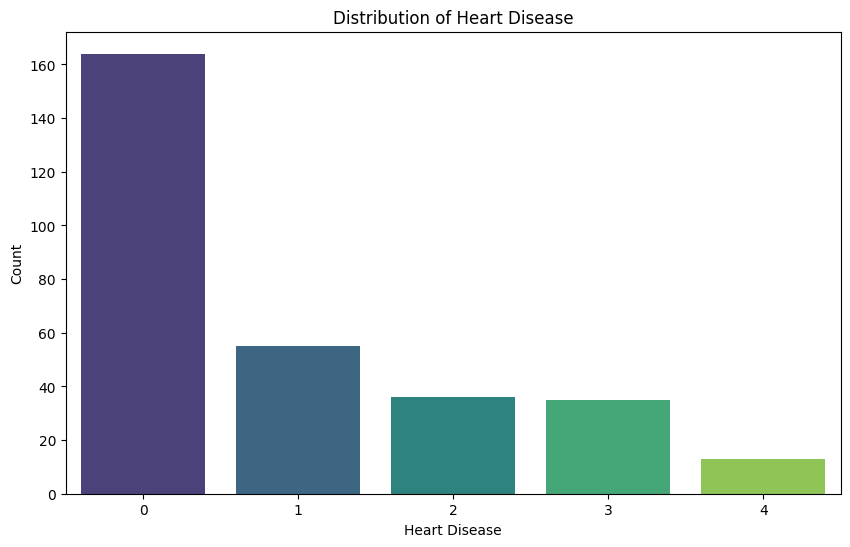

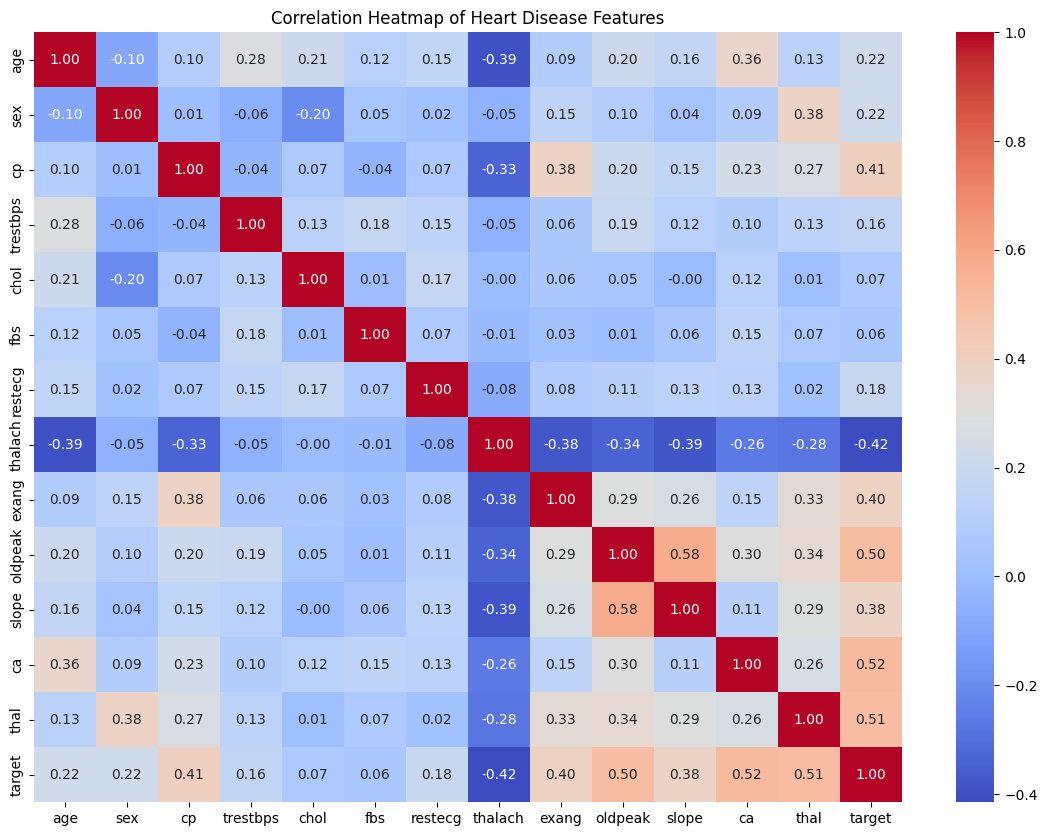

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='target', palette='viridis')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Heart Disease Features')
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Data preprocessing
df.dropna(inplace=True)
X = df.drop('target', axis=1)
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[46  2  0  1  0]
 [ 9  2  1  4  1]
 [ 3  2  3  2  0]
 [ 2  3  3  1  2]
 [ 2  0  0  1  0]]
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        49
           1       0.22      0.12      0.15        17
           2       0.43      0.30      0.35        10
           3       0.11      0.09      0.10        11
           4       0.00      0.00      0.00         3

    accuracy                           0.58        90
   macro avg       0.30      0.29      0.29        90
weighted avg       0.51      0.58      0.53        90



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
import numpy as np

# Define a function to make predictions and offer recommendations
def prescriptive_analysis(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])
    prediction = model.predict(data)[0]

    if prediction == 1:
        return "High risk of heart disease. Recommend lifestyle changes, medication, and regular check-ups."
    else:
        return "Low risk of heart disease. Continue with regular health monitoring and a healthy lifestyle."

# Example usage
age = 65
sex = 2
cp = 2
trestbps = 140
chol = 280
fbs = 0
restecg = 1
thalach = 150
exang = 0
oldpeak = 2.3
slope = 2
ca = 3
thal = 3

recommendation = prescriptive_analysis(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)
print(recommendation)


High risk of heart disease. Recommend lifestyle changes, medication, and regular check-ups.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
